# 互评作业4——离群点检测之Skin数据集

1、导入Pyod库

In [110]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import os
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import random

2.异常检测，生成结果文件
注：原运行代码部分因为输出行数过多所以删除了，换为以下代码（注释掉输出）

In [ ]:
path = 'E:\\skin\\benchmarks\\'
result='E:\\skin\\results\\'
files = os.listdir(path)
train_csv = list(files)
label=[['clf_name','out_rate','R_out_count','P_out_count','P_nor_count','AUC','AP']]
label_D=pd.DataFrame(label)
label_D.to_csv(result+"CBLOF_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"KNN_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"Isolation Forest_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"Feature Bagging_re.csv",mode='a',index=False, header=False)
label_D.to_csv(result+"HBOS_re.csv",mode='a',index=False, header=False)
for i in range(len(train_csv)):
    #print("正在处理的文件为：%s" %(train_csv[i]))
    df = pd.read_csv(path+train_csv[i])
    label=[]
    X=df[['R','G','B']]
    count=0
    for i in range(len(df)):
        if df['ground.truth'][i]=="nominal":
            label+=[1]
        if df['ground.truth'][i]=='anomaly':
            label+=[0]
            count+=1
    Y=label
    random_state = np.random.RandomState(42)
    outliers_rate = count/len(df)
    outliers_fraction=outliers_rate
    if outliers_fraction>=0.5:
        outliers_fraction=0.4
    classifiers = {
        'CBLOF':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
    }
    #print("算法运行中：")
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print("算法：%s 正在运行" % (clf_name))
        clf.fit(X)
        y_pred=clf.labels_ 
        n_out=np.count_nonzero(y_pred)
        n_normal=len(y_pred)-n_out
        #print("原数据的异常值数量为：%d;异常值数量：%d;正常值：%d" %(count,n_out,n_normal))
        
        for i in range(len(y_pred)):
            if(y_pred[i]==1):
                y_pred[i]=0
            else:
                y_pred[i]=1
        AUC=roc_auc_score(Y, y_pred)
        AP=average_precision_score(Y, y_pred)
        list=[[clf_name,outliers_rate,count,n_out,n_normal,AUC,AP]]
        list_d=pd.DataFrame(list)
        list_d.to_csv(result+clf_name+"_re.csv",mode='a',index=False, header=False)
        #print("AUC=%4lf;AP=%4lf" %(AUC,AP))
        #print("算法：%s 运行完毕" % (clf_name))

3.加载生成的5种csv文件
方法：CBLOF，Feature Bagging,HBOS,Isolation Forest,KNN

In [28]:
df_cblof=pd.read_csv(path_new + '/' + 'CBLOF_re.csv')
df_cblof.info()
df_fb=pd.read_csv(path_new + '/' + 'Feature Bagging_re.csv')
# df_fb.info()
df_hbos=pd.read_csv(path_new + '/' + 'HBOS_re.csv')
# df_hbos.info()
df_if=pd.read_csv(path_new + '/' + 'Isolation Forest_re.csv')
# df_if.info()
df_knn=pd.read_csv(path_new + '/' + 'KNN_re.csv')
# df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clf_name     1500 non-null   object 
 1   out_rate     1500 non-null   float64
 2   R_out_count  1500 non-null   int64  
 3   P_out_count  1500 non-null   int64  
 4   P_nor_count  1500 non-null   int64  
 5   AUC          1500 non-null   float64
 6   AP           1500 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 82.2+ KB


4.数据描述
5种结果分别描述其属性（离群点率，离群点数量，正常点数量，AUC，AP）的数量、均值、最值，中位数。

In [30]:
df_cblof.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.088042,527.816000,454.212667,5545.173333,0.491808,0.911262
std,0.145238,869.627908,587.436567,589.502310,0.085736,0.152071
min,0.001000,6.000000,0.000000,3344.000000,0.120208,0.246940
25%,0.005000,30.000000,30.000000,5400.000000,0.473684,0.890286
50%,0.050000,300.000000,300.000000,5700.000000,0.497487,0.959005
75%,0.100000,600.000000,600.000000,5970.000000,0.499666,0.994975
max,0.713167,4279.000000,2401.000000,6000.000000,0.743860,0.999000


In [32]:
df_fb.describe()


,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.088042,527.816000,453.854667,5545.531333,0.490583,0.909520
std,0.145238,869.627908,587.540215,589.605967,0.019009,0.149136
min,0.001000,6.000000,0.000000,3344.000000,0.404073,0.263111
25%,0.005000,30.000000,30.000000,5400.000000,0.482522,0.896515
50%,0.050000,300.000000,297.000000,5703.000000,0.496491,0.950834
75%,0.100000,600.000000,600.000000,5970.000000,0.499499,0.994975
max,0.713167,4279.000000,2400.000000,6000.000000,0.553872,0.999000


In [33]:
df_hbos.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.088042,527.816000,437.320000,5562.066000,0.477698,0.907457
std,0.145238,869.627908,579.043577,581.090209,0.060010,0.154059
min,0.001000,6.000000,0.000000,3385.000000,0.182836,0.243216
25%,0.005000,30.000000,22.000000,5402.000000,0.476400,0.894061
50%,0.050000,300.000000,241.000000,5759.000000,0.495833,0.950263
75%,0.100000,600.000000,598.000000,5978.000000,0.499499,0.994982
max,0.713167,4279.000000,2431.000000,6000.000000,0.778241,0.999000


In [34]:
df_if.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.088042,527.816000,454.134000,5545.252000,0.468158,0.906890
std,0.145238,869.627908,587.424517,589.489902,0.077147,0.152267
min,0.001000,6.000000,0.000000,3345.000000,0.108783,0.245765
25%,0.005000,30.000000,30.000000,5400.000000,0.460278,0.890937
50%,0.050000,300.000000,300.000000,5700.000000,0.494949,0.948669
75%,0.100000,600.000000,600.000000,5970.000000,0.497906,0.994975
max,0.713167,4279.000000,2400.000000,6000.000000,0.723241,0.999000


In [35]:
df_knn.describe()

,out_rate,R_out_count,P_out_count,P_nor_count,AUC,AP
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.088042,527.816000,454.622000,5544.764000,0.481739,0.909469
std,0.145238,869.627908,587.189369,589.255551,0.082743,0.149220
min,0.001000,6.000000,1.000000,3344.000000,0.094554,0.264069
25%,0.005000,30.000000,30.000000,5400.000000,0.489474,0.894003
50%,0.050000,300.000000,300.000000,5700.000000,0.499499,0.950500
75%,0.100000,600.000000,600.000000,5970.000000,0.513724,0.995142
max,0.713167,4279.000000,2401.000000,5999.000000,0.597990,0.999166


5.可视化之AUC盒图

e:\python37\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


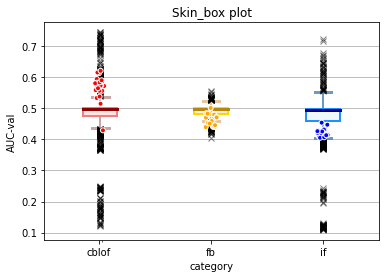

In [128]:
#盒图
def drawbox2():
    tang_data = [df_cblof['AUC'],df_fb['AUC'],df_if['AUC']]
    df_tang=pd.DataFrame({'category':['cblof','cblof','cblof','cblof','cblof','cblof','cblof','cblof',
                                      'cblof','cblof','cblof','cblof','cblof','cblof','cblof','cblof',
                                      'cblof','cblof','cblof','cblof'
                                      ,'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb',
                                      'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb', 'fb',
                                       'if','if','if','if','if','if','if','if','if','if','if',
                                      'if','if','if','if','if','if','if','if','if'
                                      ],
                          'auc':[df_cblof.iloc[0,5],df_cblof.iloc[1,5],df_cblof.iloc[2,5],df_cblof.iloc[3,5],
                               df_cblof.iloc[4,5],df_cblof.iloc[5,5],df_cblof.iloc[6,5],df_cblof.iloc[7,5],
                               df_cblof.iloc[8,5],df_cblof.iloc[9,5],df_cblof.iloc[10,5],df_cblof.iloc[11,5],
                               df_cblof.iloc[12,5],df_cblof.iloc[13,5],df_cblof.iloc[14,5],df_cblof.iloc[15,5],
                               df_cblof.iloc[16,5],df_cblof.iloc[17,5],df_cblof.iloc[18,5],df_cblof.iloc[19,5],
                               df_fb.iloc[0,5],df_fb.iloc[1,5],df_fb.iloc[2,5],df_fb.iloc[3,5],
                               df_fb.iloc[4,5],df_fb.iloc[5,5],df_fb.iloc[6,5],df_fb.iloc[7,5],
                               df_fb.iloc[8,5],df_fb.iloc[9,5],df_fb.iloc[10,5],df_fb.iloc[11,5],
                               df_fb.iloc[12,5],df_fb.iloc[13,5],df_fb.iloc[14,5],df_fb.iloc[15,5],
                               df_fb.iloc[16,5],df_fb.iloc[17,5],df_fb.iloc[18,5],df_fb.iloc[19,5],
                               df_if.iloc[0,5],df_if.iloc[1,5],df_if.iloc[2,5],df_if.iloc[3,5],
                               df_if.iloc[4,5],df_if.iloc[5,5],df_if.iloc[6,5],df_if.iloc[7,5],
                               df_if.iloc[8,5],df_if.iloc[9,5],df_if.iloc[10,5],df_if.iloc[11,5],
                               df_if.iloc[12,5],df_if.iloc[13,5],df_if.iloc[14,5],df_if.iloc[15,5],
                               df_if.iloc[16,5],df_if.iloc[17,5],df_if.iloc[18,5],df_if.iloc[19,5],
                              ]})
    df_tang.to_csv('df_tang.csv')

    #fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    #fig,axes=plt.subplots(plt.subplots(nrows=1, ncols=1, figsize=(12, 5)))

    #axes[0].violinplot(tang_data, showmeans=False, showmedians=True)
    #axes[0].set_title('NPIme_violin plot')

    #v = axes[0].violinplot(tang_data, showmeans=False, showmedians=True,color=['red','blue'])
    #print(v)


    # 绘制分类散点图
    # INPUT  -> 分组列, 统计列

    # 添加分布散点图 boxplot with jitter
    color_scatter= ['red','orange', 'blue']    # 散点颜色
    color_boxes = ['mistyrose','papayawhip','aliceblue'] # 盒图填充颜色
    #axes[1] = sns.boxplot(x='category', y='r', data=df_tang,saturation=1,linewidth=2,width=3)
    #plt.show()

    ###############################################################

    # 通过stripplot添加分布散点图，jitter设置数据间距
    axes = sns.stripplot(x='category',  # 设置分组统计字段
                         y='auc',  # 数据分布统计字段
                            # 这里xy数据对调，会使得散点图横向分布
                            order=['cblof','fb','if'],
                            jitter=0.05,  # jitter代表设置抖动
                            edgecolor='w', linewidth=1, marker='o', data=df_tang,
                            palette=color_scatter)

    f = axes.boxplot(tang_data,patch_artist=True,positions=(0.01,1,2),showfliers=None)
    #plt.setp(f, xticks=[y + 1 for y in range(len(tang_data))], xticklabels=['l2r', 'l-r'])
    axes.set_xticks([0.03,1],['cblof','fb','if'])
    # 这里共有四个box
    color_edge=['lightcoral','gold','dodgerblue']
    for box, cb,ce in zip(f['boxes'], color_boxes,color_edge):
        # 箱体边框颜色
        box.set(color=ce, linewidth=2)
        # 箱体内部填充颜色
        box.set(facecolor=cb)

    color_w=['rosybrown','rosybrown','burlywood','burlywood','steelblue','steelblue']
    # 这里设置的是各个box的其他属性
    for whisker,cw in zip(f['whiskers'],color_w):
        whisker.set(color=cw, linewidth=2,alpha=0.8)
    color_c = ['rosybrown','rosybrown','burlywood','burlywood','steelblue','steelblue']
    for cap,cc in zip(f['caps'],color_c):
        cap.set(color=cc, linewidth=3,alpha=0.8)
    #中位线
    color_median=['darkred','darkgoldenrod','DarkBlue']
    for median,cm in zip(f['medians'],color_median):
        median.set(color=cm, linewidth=3)

    for flier in f['fliers']:
        flier.set(marker='x', color='w', alpha=0.5)
    #####################################################
    axes.set_title('Skin_box plot')

    # for ax in axes:
    # 对y轴加上网格
    axes.yaxis.grid(True)
    axes.set_xticks([y + 1 for y in range(len(tang_data))])
    # 对每个图加上xticks操作
    plt.ylabel('AUC-val')
    plt.setp(axes, xticks=[y for y in range(len(tang_data))], xticklabels=['cblof', 'fb',
                                                                           'if'])
    plt.plot()
    plt.show()

drawbox2()

6.可视化之密度图

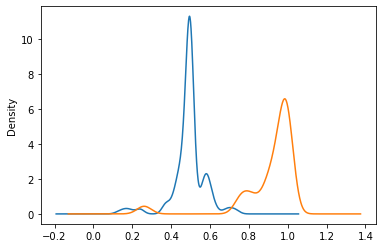

In [120]:
import matplotlib.pyplot as plt
df_cblof['AUC'].plot(kind='kde')
df_cblof['AP'].plot(kind='kde')

plt.show()

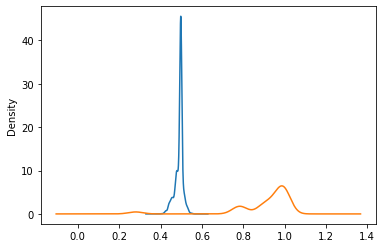

In [121]:
df_fb['AUC'].plot(kind='kde')
df_fb['AP'].plot(kind='kde')

plt.show()

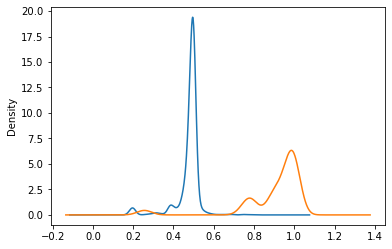

In [43]:
df_hbos['AUC'].plot(kind='kde')
df_hbos['AP'].plot(kind='kde')

plt.show()

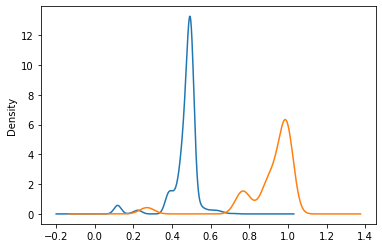

In [44]:
df_if['AUC'].plot(kind='kde')
df_if['AP'].plot(kind='kde')

plt.show()

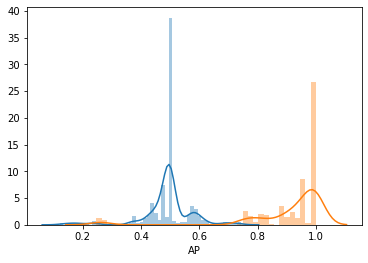

In [50]:
import seaborn as sns
sns.distplot(df_cblof['AUC'])
sns.distplot(df_cblof['AP'])


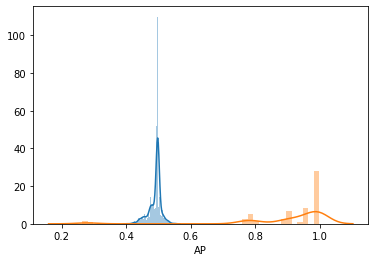

In [51]:
sns.distplot(df_fb['AUC'])
sns.distplot(df_fb['AP'])

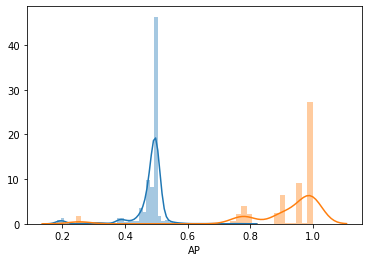

In [52]:
sns.distplot(df_hbos['AUC'])
sns.distplot(df_hbos['AP'])

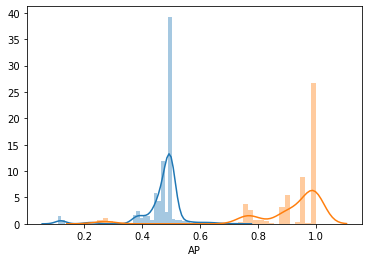

In [53]:
sns.distplot(df_if['AUC'])
sns.distplot(df_if['AP'])


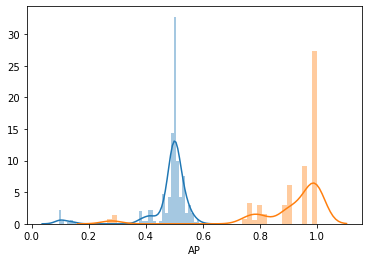

In [54]:
sns.distplot(df_knn['AUC'])
sns.distplot(df_knn['AP'])

7，可视化之散点图

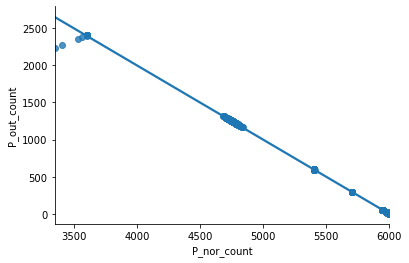

In [82]:
sns.regplot(x="P_nor_count", y="P_out_count", data=df_if)
sns.despine();

8.可视化之矩阵图

In [109]:
#离群点图 ——矩阵形式
#先对率从高到低排序
df_cb_sort=df_cblof.sort_values(by='out_rate',ascending=False)

df_cb_sort


xx , yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))

for i in range(10):
    print("正在处理的文件为：%s" %(train_csv[i]))
    df = pd.read_csv(path+train_csv[i])
    label=[]
    X=df[['R','G','B']]
    count=0
    for i in range(len(df)):
        if df['ground.truth'][i]=="nominal":
            label+=[1]
        if df['ground.truth'][i]=='anomaly':
            label+=[0]
            count+=1
    Y=label
    random_state = np.random.RandomState(42)
    outliers_rate = count/len(df)
    outliers_fraction=outliers_rate
    if outliers_fraction>=0.5:
        outliers_fraction=0.4
    classifiers = {
        'CBLOF':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'KNN': KNN(contamination=outliers_fraction),
        'HBOS': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
    }
    print("算法运行中：")
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print("算法：%s 正在运行" % (clf_name))
        clf.fit(X)
        y_pred=clf.labels_ 
        n_out=np.count_nonzero(y_pred)
        n_normal=len(y_pred)-n_out
        print("原数据的异常值数量为：%d;异常值数量：%d;正常值：%d" %(count,n_out,n_normal))
        
        for i in range(len(y_pred)):
            if(y_pred[i]==1):
                y_pred[i]=0
            else:
                y_pred[i]=1
        AUC=roc_auc_score(Y, y_pred)
        AP=average_precision_score(Y, y_pred)
        #list=[[clf_name,outliers_rate,count,n_out,n_normal,AUC,AP]]
        #list_d=pd.DataFrame(list)
        #list_d.to_csv(result+clf_name+"_re.csv",mode='a',index=False, header=False)
        print("AUC=%4lf;AP=%4lf" %(AUC,AP))
        print("算法：%s 运行完毕" % (clf_name))
        
        #df_cb_sort.iloc[i,2]
        
        # 设定一个阈值用以识别正常值和异常值的标准
        threshold = np.percentile(y_pred, 100 * outliers_fraction)
        
        #决策函数为每一个数据点计算异常值分数
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)

#         if clf_name == "Local Outlier Factor":
#              Z = clf._decision_function(np.c_[xx.ravel(),yy.ravel()])
#         else:
#             Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
#         Z = Z.reshape(xx.shape)
        #在图上对从最小的异常值分数到阈值的范围内进行分层着色
        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
        #在异常值分数等于阈值处画红色线条
        a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
        #填充橙色轮廓线，其中异常分数的范围是从阈值到最大异常分数
        plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
        c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
        plt.axis('tight')   
        plt.legend([a.collections[0], b,c], ['决策函数', '正常值','异常值'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
        plt.xlim((0, 1))
        plt.ylim((0, 1))
        plt.title('CBLOF(Cluster-based Local Outlier Factor)')
        plt.show();


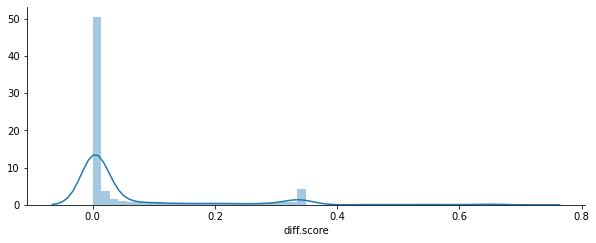

In [89]:

 
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.distplot(df['diff.score'])
sns.despine()

plt.show();

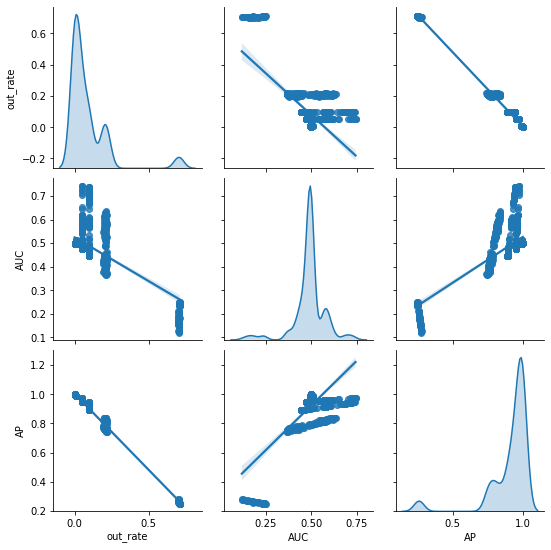

In [106]:
#markers=["o", "s", "D", "^"]
#palette="husl",  # 调色板：husl / Set1
g = sns.pairplot(df_cblof,
                 kind="reg",diag_kind="kde",
                 vars=["out_rate", "AUC", "AP"])

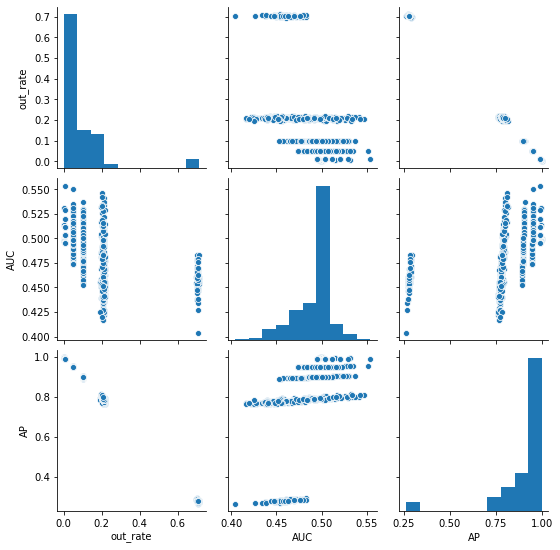

In [107]:
g = sns.pairplot(df_fb,
                 vars=["out_rate", "AUC", "AP"])

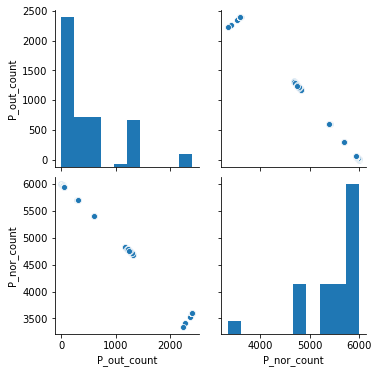

In [108]:
g = sns.pairplot(df_if,
                 vars=["P_out_count", "P_nor_count"])